# 0. Sinusoids
Exercises with sinusoids for fun and profit.

Adarsh Ram

## 0.a Imports

In [1]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [2]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.11
Matplot:	 3.7.2
Numpy:  	 1.24.3
SciPy:  	 1.11.1


# 1. Set up sinusoids
We'll use this stuff again.  Might be handy to create some functions that you can re-use.

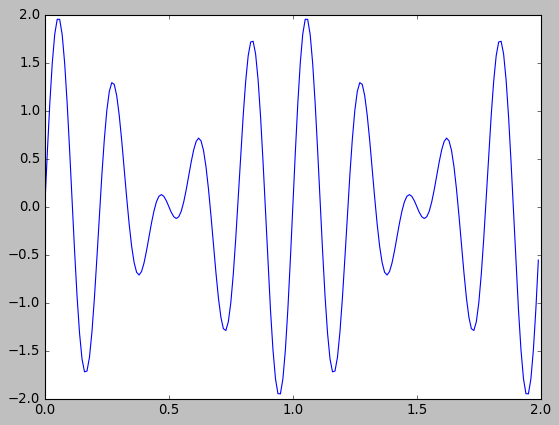

In [3]:
# Frequencies & Length
f1 = 5
f2 = 4
duration = 2.0

# Sampling Rate
Fs = 20 * max(f1,f2)

# Time vector and Sinusoids
t = np.arange(0, duration, 1/Fs)
s1 = np.sin(f1 * 2 * sp.pi * t)
s2 = np.sin(f2 * 2 * sp.pi * t)

# Add them up
s3 = s1 + s2

plt.plot(t,s3)
plt.show()

## 1.a Plots
Individually and together using subplots

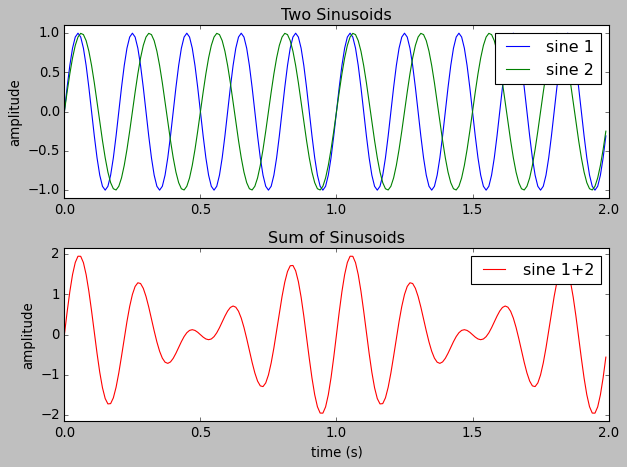

In [4]:
# Individually
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, s1, color='blue', label='sine 1')
plt.plot(t, s2, color='green', label='sine 2')

plt.xlim(0,duration) 
mm = 1.1 * max(s1)
plt.ylim(-mm,mm) 
plt.title('Two Sinusoids')
plt.ylabel('amplitude')
plt.legend()

# Together
plt.subplot(2,1,2)
plt.plot(t, s3, color='red', label='sine 1+2')

plt.xlim(0,duration) 
mm = 1.1 * max(s3)
plt.ylim(-mm,mm) 
plt.title('Sum of Sinusoids')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## 1.b Display should actually should be "stems"
This only shows a small time segment for clarity. Note the use of "//" for integer divide.

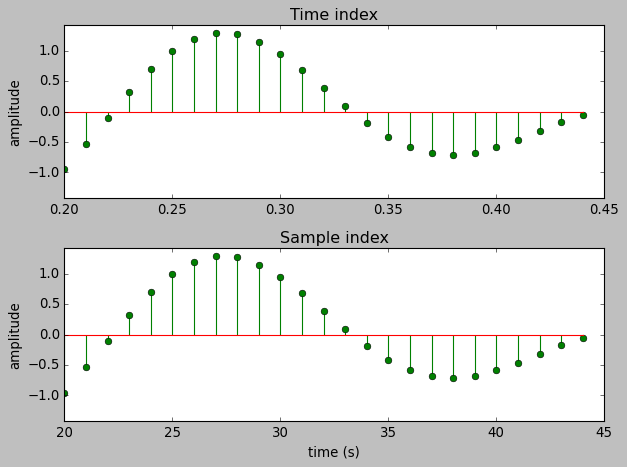

In [5]:
plt.figure()

ssnip = s3

snip = len(ssnip) // 8
start = len(ssnip) // 10
end = start + snip

tsnip = t[start:end]
ssnip = ssnip[start:end]
nsnip = np.arange(start,end,1)

# Time index
plt.subplot(2,1,1)
plt.stem(tsnip, ssnip, linefmt='g')

mm = 1.1 * max(np.abs(ssnip))
plt.ylim(-mm,mm) 
plt.title('Time index')
plt.ylabel('amplitude')

# Sample index
plt.subplot(2,1,2)
plt.stem(nsnip, ssnip, linefmt='g')

mm = 1.1 * max(np.abs(ssnip))
plt.ylim(-mm,mm) 
plt.xlim(start,end)
plt.title('Sample index')
plt.xlabel('time (s)')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()

# Assignment:
1. Make your own Jupyter Notebook that plots various sinusoids
2. Manipulate them in other ways and describe what happens in a comment box
    * Change amplitude
    * Change phase and show the correct offset
    * Use different mathematical operations (e.g. subtract, multiply, etc.)
3. Measure some things
    * Annotate the plot showing the time difference between samples graphically
    * Annotate the plot showing the period of the sinusoid, and validate its frequency
4. Fun to do:  
    * Include a GUI widget to change various values and replot interactively
    * Experiment with different plot characteristics (e.g. grid, axis, titles, annotations, background, etc.)

In [6]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

#function adds, subtracts, or multiplies two sinusoidal waves and displays their sum, difference, or product. 
#The functions consider wave amplitudes, phase changes, frequencies, and operation (adding, subtracting, multiplying).
def plot_sinusoids(amplitude_factor=1.0, phase_offset=0.0, operation='add'):

    f1 = 5
    f2 = 4
    duration = 2.0


    Fs = 20 * max(f1, f2)

    
    t = np.arange(0, duration, 1/Fs)
    s1 = amplitude_factor * np.sin(f1 * 2 * np.pi * t + phase_offset)
    s2 = np.sin(f2 * 2 * np.pi * t)


    if operation == 'add':
        s3 = s1 + s2
        operation_text = 'Addition'
    elif operation == 'subtract':
        s3 = s1 - s2
        operation_text = 'Subtraction'
    elif operation == 'multiply':
        s3 = s1 * s2
        operation_text = 'Multiplication'
    else:
        raise ValueError("Invalid operation")

#Matplotlib used to construct single figure with three subplots. 
#Each showing a sinusoidal signal (s1, s2, s3) with colors and labels
#Third showing the outcome of an operation (e.g., addition or multiplication) on the first two sinusoids.
    plt.figure(figsize=(10, 6))


    plt.subplot(2, 2, 1)
    plt.plot(t, s1, color='blue', label='sine 1')
    plt.title('Sinusoid 1')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')

    plt.subplot(2, 2, 2)
    plt.plot(t, s2, color='green', label='sine 2')
    plt.title('Sinusoid 2')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')


    plt.subplot(2, 1, 2)
    plt.plot(t, s3, color='red', label=operation_text)
    plt.title(f'{operation_text} of Sinusoids')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')

#Code uses Matplotlib to create interactive plot comparing two sinusoidal waves
#Customizable amplitude, phase offset, operation
#Time difference, period, and frequency annotations.
    plt.annotate('', xy=(t[1], s3[1]), xytext=(t[0], s3[0]), arrowprops=dict(arrowstyle='<->', color='black'), fontsize=8)
    plt.text(t[0] + 0.03, s3[0], 'Time Difference', verticalalignment='bottom', fontsize=8)

    period = 1 / f1
    plt.annotate('', xy=(t[0] + period, s3[0]), xytext=(t[0], s3[0]),
                 arrowprops=dict(arrowstyle='<->', color='blue'), fontsize=8)
    plt.text(t[0] + period / 2, s3[0] + 0.2, 'Period', horizontalalignment='center', fontsize=8)
    plt.text(t[0] + period / 2, s3[0] - 0.2, f'Frequency: {1/period:.2f} Hz', horizontalalignment='center', fontsize=8)

    plt.tight_layout()
    plt.show()

interact(plot_sinusoids, amplitude_factor=widgets.FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='Amplitude Factor'),
         phase_offset=widgets.FloatSlider(min=0, max=2*np.pi, step=np.pi/6, value=0, description='Phase Offset'),
         operation=widgets.Dropdown(options=['add', 'subtract', 'multiply'], value='add', description='Operation'))

interactive(children=(FloatSlider(value=1.0, description='Amplitude Factor', max=2.0, min=0.5), FloatSlider(va…

<function __main__.plot_sinusoids(amplitude_factor=1.0, phase_offset=0.0, operation='add')>

This notebook makes sinusoidal signals with various amplitudes, phases, and mathematical processes and then shows them. The code creates a function called plot_sinusoids that takes in two sinusoidal signals, calculates them using a mathematical operation such as addition, subtraction, or multiplication, and then shows both the individual signals and the combined signals.